In [1]:
import jittor as jt
import matplotlib.pyplot as plt
import numpy as np
from jittor import nn, Module, init
import random

[i 1012 21:12:54.066258 76 log.cc:351] Load log_sync: 1
[i 1012 21:12:54.127608 76 compiler.py:955] Jittor(1.3.5.18) src: /home/ljy/anaconda3/envs/ox/lib/python3.8/site-packages/jittor
[i 1012 21:12:54.133976 76 compiler.py:956] g++ at /usr/bin/g++(9.4.0)
[i 1012 21:12:54.135206 76 compiler.py:957] cache_path: /home/ljy/.cache/jittor/jt1.3.5/g++9.4.0/py3.8.13/Linux-5.10.102xbf/IntelRCoreTMi7x12/default
[i 1012 21:12:56.197846 76 install_cuda.py:88] cuda_driver_version: [11, 6]
[i 1012 21:12:56.221816 76 __init__.py:411] Found /home/ljy/.cache/jittor/jtcuda/cuda11.2_cudnn8_linux/bin/nvcc(11.2.152) at /home/ljy/.cache/jittor/jtcuda/cuda11.2_cudnn8_linux/bin/nvcc.
[i 1012 21:12:56.298881 76 __init__.py:411] Found addr2line(2.34) at /usr/bin/addr2line.
[i 1012 21:12:56.520199 76 compiler.py:1010] cuda key:cu11.2.152
[i 1012 21:12:57.089490 76 __init__.py:227] Total mem: 12.30GB, using 4 procs for compiling.
[i 1012 21:12:57.354843 76 jit_compiler.cc:28] Load cc_path: /usr/bin/g++
[i 1012 2

In [2]:
np.random.seed(0)
jt.set_seed(3)
n_train = 800
n_test = 200
batch_size = 4

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def get_data(n):
    for i in range(n):
        x = np.random.rand(batch_size, 1)*6 - 3 # sample from (-3,3)
        y = gaussian(x,0,3)
        yield jt.float32(x), jt.float32(y)



In [3]:
class MLP(Module):
    def __init__(self):
        self.layer1 = nn.Linear(1, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def execute(self,x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x


In [4]:
model = MLP()
lr = 0.1
optim = nn.SGD(model.parameters(), lr)

for i,(x,y) in enumerate(get_data(n_train)):
    pred_y = model(x)
    loss = jt.sqr(pred_y - y)
    loss_mean = loss.mean()
    optim.step(loss_mean)
    print(f"step {i}, loss = {loss_mean.numpy().sum()}")

step 0, loss = 0.9772279262542725
step 1, loss = 0.8800617456436157
step 2, loss = 0.9343262314796448
step 3, loss = 0.05833223834633827
step 4, loss = 0.004426539875566959
step 5, loss = 0.06428409367799759
step 6, loss = 0.027108801528811455
step 7, loss = 0.07967979460954666
step 8, loss = 0.04535745456814766
step 9, loss = 0.04851743206381798
step 10, loss = 0.054267995059490204
step 11, loss = 0.0033882709685713053
step 12, loss = 0.03537195920944214
step 13, loss = 0.0901155173778534
step 14, loss = 0.050855472683906555
step 15, loss = 0.015508539043366909
step 16, loss = 0.0167166106402874
step 17, loss = 0.016631407663226128
step 18, loss = 0.014594091102480888
step 19, loss = 0.023013481870293617
step 20, loss = 0.022619187831878662
step 21, loss = 0.010498915798962116
step 22, loss = 0.010097118094563484
step 23, loss = 0.006207961123436689
step 24, loss = 0.041208963841199875
step 25, loss = 0.01831793040037155
step 26, loss = 0.007425278425216675
step 27, loss = 0.012635361

In [5]:
x_list = []
pred_list = []
for i in range(n_test):
    x = np.random.rand()*6 - 3
    x_list.append(x)
    x = jt.float32(x)
    pred_y = model(x)
    pred_list.append(float(pred_y))
    

In [8]:
x_and_pred = zip(x_list, pred_list)
x_and_pred = sorted(x_and_pred, key=lambda x:x[0])
x_list, pred_list = zip(*x_and_pred)

x_normal = np.arange(-3,3,0.1)
y_normal = gaussian(x_normal,0,3)

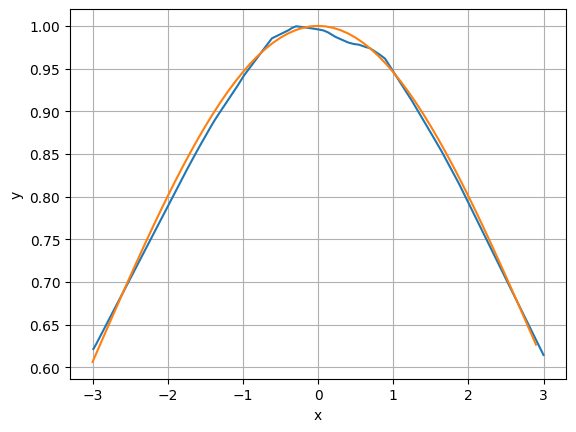

In [10]:

fig, ax = plt.subplots()
ax.plot(x_list, pred_list)
ax.plot(x_normal, y_normal)
ax.set(xlabel='x', ylabel='y')
ax.grid()

fig.savefig("output.png")
plt.show()